In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('JobMarketData.csv')
df.head()

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6
3,Machine Learning Engineer,2Coms Consulting Pvt Ltd.,"Chennai, Pune, Mumbai",3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,PG/Phd,Full Time,1200000-2100000,1200000,2100000,3
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,Phd,Full Time,5000000-1700000,5000000,1700000,8


In [3]:
df.dropna(inplace=True)
df.isnull().sum()

Role                    0
Companies               0
Location                0
Experience              0
Skills                  0
Company Size            0
Eligibility Criteria    0
Enrollment Type         0
Salary                  0
Min Salary              0
Max Salary              0
Min Experience          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Role                  313 non-null    object
 1   Companies             313 non-null    object
 2   Location              313 non-null    object
 3   Experience            313 non-null    object
 4   Skills                313 non-null    object
 5   Company Size          313 non-null    object
 6   Eligibility Criteria  313 non-null    object
 7   Enrollment Type       313 non-null    object
 8   Salary                313 non-null    object
 9   Min Salary            313 non-null    object
 10  Max Salary            313 non-null    object
 11  Min Experience        313 non-null    object
dtypes: object(12)
memory usage: 31.8+ KB


In [5]:
Role=df['Role'].value_counts()
Role

Data Scientist                                             146
Machine Learning Engineer                                   70
Data Analyst                                                40
Data Engineer                                               11
Software Engineer                                            8
Artificial Intelligence Architect                            4
Python Developer                                             3
Machine Learning Architect                                   3
Teradata Administrator                                       1
Engineer,Product Applications                                1
Tibco Spotfire Developer                                     1
Knime                                                        1
Technical Project Lead                                       1
Teradata, Informatica Developer                              1
Customer Success Manager                                     1
Solution Engineer                                      

In [6]:
most_role=Role[Role>4].index
most_role

Index(['Data Scientist', 'Machine Learning Engineer', 'Data Analyst',
       'Data Engineer', 'Software Engineer'],
      dtype='object')

In [7]:
df=df[df['Role'].isin(most_role)]

In [8]:
df.sample(5)

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
12,Data Engineer,3LOQ Labs Pvt. Ltd.,Mumbai,2-5 Yrs,Distribution System\nSCALA\nData Mining\nSpark...,50,UG/PG,Full Time,450000-750000,450000,750000,2
146,Data Analyst,DBS,Mumbai,3-8 Yrs,DataAnalysis\nPython\nMachineLearning\nMySQL\n...,21000,UG/PG,Full Time,1000000-1300000,1000000,1300000,3
319,Data Scientist,SpotDraft,Gurgaon,1 - 5 years,ComputerLanguages\nDataAnalysisProcess\nOptimi...,200,B.Tech,"Full Time, Permanent",1600000-1900000,1600000,1900000,1
225,Data Engineer,Jubilant Foodworks,Noida,12 - 14 years,Data Engineering,21174,Any Graduate,Full Time,400000-700000,400000,700000,12
326,Data Scientist,Tactica,"Hyderabad,Bengaluru,Pune",5-10 Yrs,DataScience\nNaturalLanguageProcessing\nTextmi...,1000,UG,Full Time,900000-1900000,900000,1900000,5


In [9]:
df['Enrollment Type']=df['Enrollment Type'].str.replace('Full TIme','Full Time')
df['Enrollment Type']=df['Enrollment Type'].str.replace('Full Time, Permanent','Permanent')

In [10]:
df['Eligibility Criteria'].unique()

array(['B.Tech', 'UG', 'Phd', 'PG/Phd', 'PG', 'UG/PG', 'Any Graduate',
       'MSc/Mtech Statistics or Computing', 'B.Tech/Mtech/MSc',
       'B.Tech/B.E. in Any Specialization', 'UG/PG/PHD',
       'UG -B.Tech/B.E. in Computers', 'BCA/B.Tech',
       'BCA in Any Specialization, B.Tech/B.E. in Any Specializatio',
       'B.Tech/B.E', 'B.Sc/BCA', 'PG/PhD'], dtype=object)

In [11]:
keywords = ['B.Tech', 'UG', 'Phd', 'Mtech']

def ec(some):
    for i in keywords:
        if i in some:
            return i
            
    return 'Any Graduate'

In [12]:
df['Eligibility Criteria'] = df['Eligibility Criteria'].apply(ec)

In [13]:
df['Eligibility Criteria'].unique()

array(['B.Tech', 'UG', 'Phd', 'Any Graduate', 'Mtech'], dtype=object)

In [14]:
# df['Company Size'].astype(str)
e=['Company Size','Max Salary','Min Salary','Min Experience']
for i in e:
    df[i]=df[i].str.replace(",","")

In [15]:
a=df[df['Max Salary']=='#VALUE!']
a
# df.drop(a.index,axis=0,inplace=True)

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
88,Data Scientist,Analytics Vidhya Educon Pvt. Ltd,Chennai,7-12 Yrs,Computer science\nWeb analytics\nMachine learn...,1500,Phd,Full Time,1900000,#VALUE!,#VALUE!,7
156,Data Engineer,Essence,New Delhi,1-3 Yrs,Python\nMachineLearning\nDataAnalysis\nBigData...,2000,UG,Full Time,980000,#VALUE!,#VALUE!,1
187,Machine Learning Engineer,HCL,"Chennai,Bengaluru,Delhi",0 Yrs,Java\nMachineLearning\nArtificalIntelligence\n...,100000,UG,Full Time,2750000,#VALUE!,#VALUE!,#VALUE!
215,Data Scientist,INK IT Solutions,"Noida,Bengaluru",3-5 Yrs,Statistics\nModeling\nDeepLearning\nMachineLea...,200,UG,Full Time,150000,#VALUE!,#VALUE!,3


In [16]:
c=df.columns
for i in c:
    a=df[df[i]=='#VALUE!']
    df.drop(a.index,axis=0,inplace=True)

In [17]:
df[['Company Size','Max Salary','Min Salary','Min Experience']]=df[['Company Size','Max Salary','Min Salary','Min Experience']].astype(int)

In [18]:
df.reset_index(drop=True,inplace=True)
# df.drop(columns=['level_0','index'],inplace=True)

In [19]:
df

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
0,Data Scientist,2Coms,New Delhi,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,B.Tech,Freelance,1000000-2000000,1000000,2000000,2
1,Machine Learning Engineer,2Coms,Mumbai,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,UG,Full Time,1800000-3300000,1800000,3300000,0
2,Data Scientist,2Coms Consulting Pvt Ltd.,"Chennai, Bengaluru",6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,Phd,Full Time,160000-185000,160000,185000,6
3,Machine Learning Engineer,2Coms Consulting Pvt Ltd.,"Chennai, Pune, Mumbai",3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,Phd,Full Time,1200000-2100000,1200000,2100000,3
4,Data Scientist,3D India Staffing Research & Consulting Co India,Bengaluru,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,Phd,Full Time,5000000-1700000,5000000,1700000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
265,Machine Learning Engineer,Zoho,Chennai,0-3 Yrs,MachineLearning\nC++\nDataStructures\nSoftware...,12000,UG,Full Time,850000-1300000,850000,1300000,0
266,Data Scientist,Peoplefy Infosolutions Pvt. Ltd,Pune,0-4 Yrs,MachineLearning\nDeepLearning\nPython,200,Any Graduate,Full Time,500000-700000,500000,700000,0
267,Data Analyst,Nike India,Bengaluru,0-5 Yrs,MachineLearning\nDataAnalytics\nOperations\nSQL,75400,UG,Full Time,400000-600000,400000,600000,0
268,Data Scientist,Simulation Hub,Pune,1-3 Yrs,DataVisualization\nInformationTechnology\nAnal...,200,UG,Full Time,800000-1000000,800000,1000000,1


# EDA

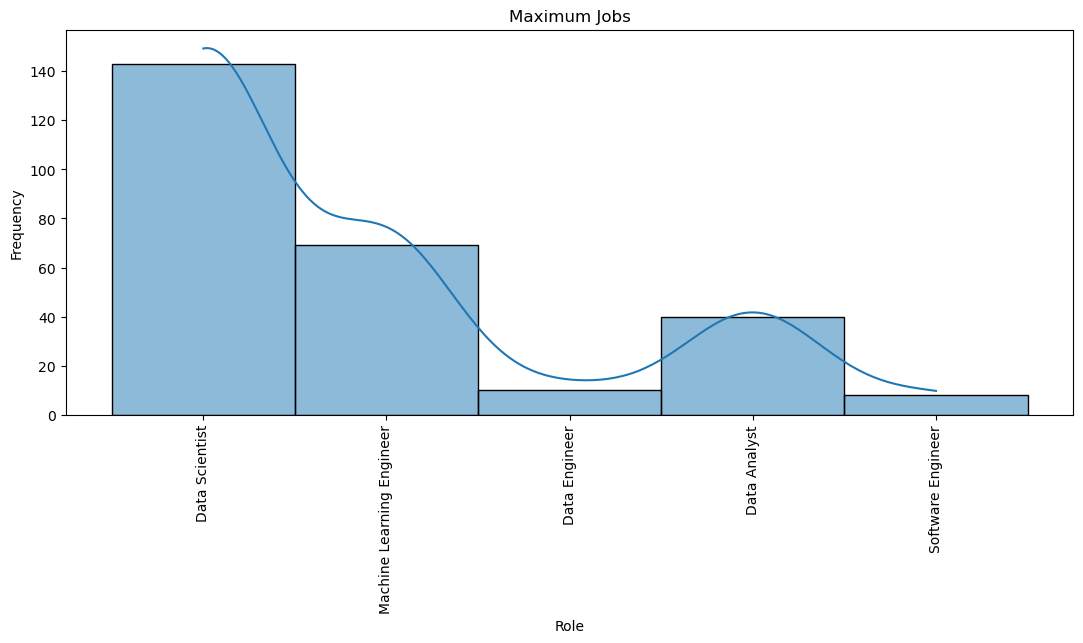

In [20]:
plt.figure(figsize=(13, 5))
sns.histplot(df['Role'],kde=True)
plt.title("Maximum Jobs")
plt.xlabel("Role")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

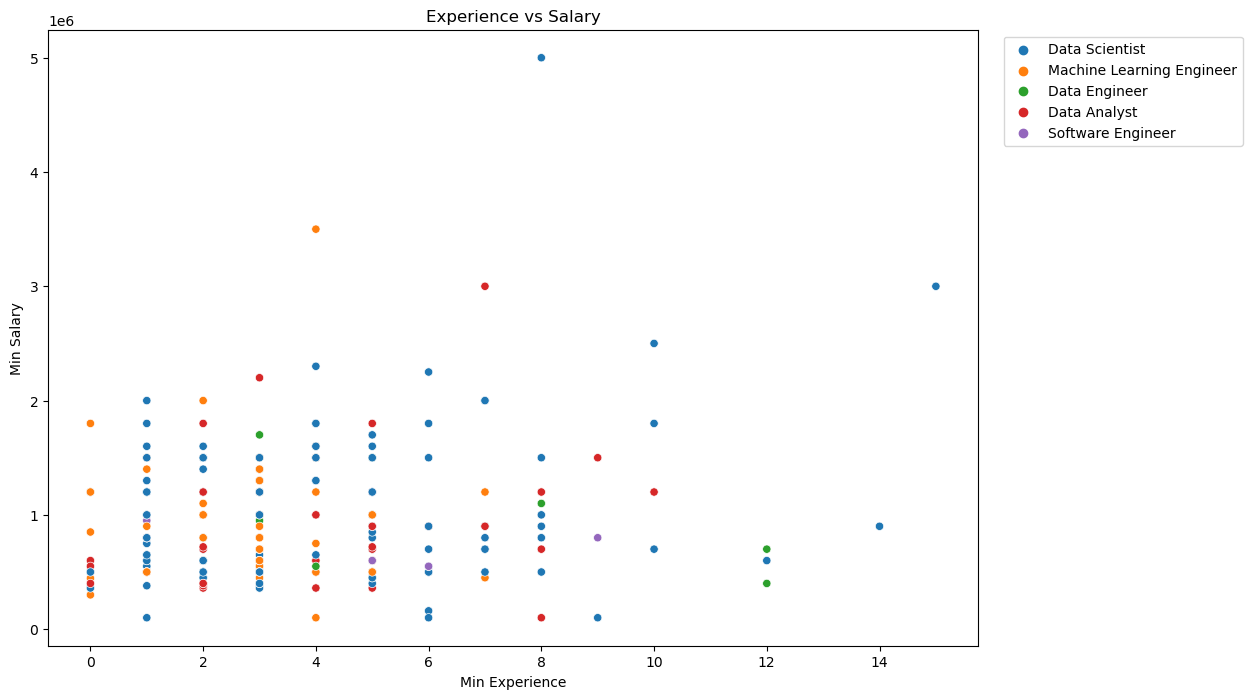

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Min Experience",y='Min Salary',data=df,hue='Role')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title("Experience vs Salary")
plt.show()

In [22]:
df.columns

Index(['Role', 'Companies', 'Location', 'Experience', 'Skills', 'Company Size',
       'Eligibility Criteria', 'Enrollment Type', 'Salary', 'Min Salary',
       'Max Salary', 'Min Experience'],
      dtype='object')

Text(0.5, 1.0, 'Count of Enrollement Type')

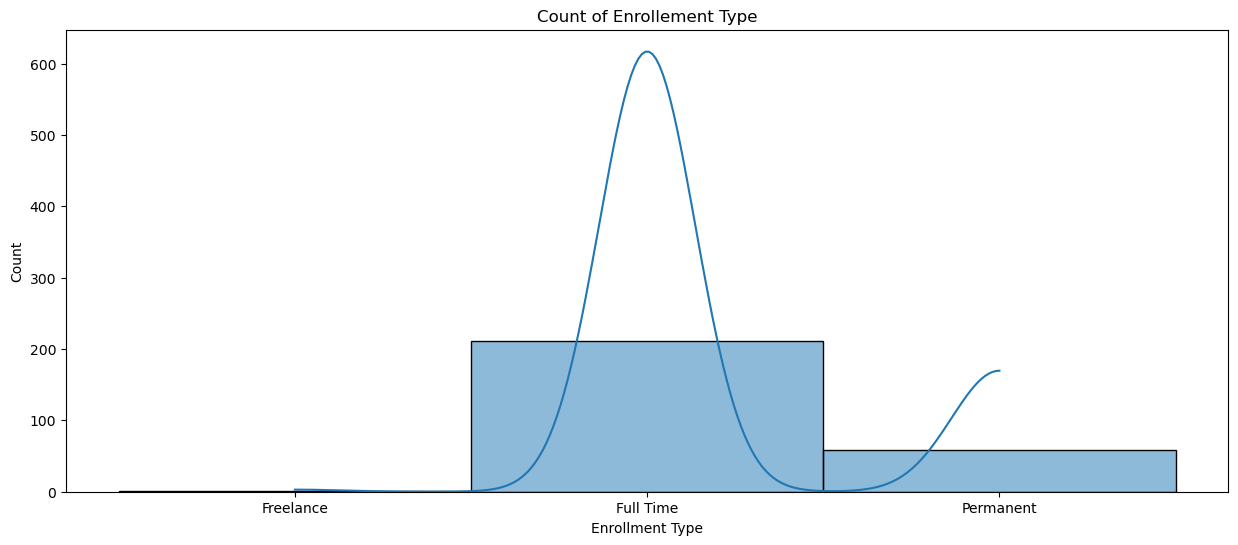

In [23]:
plt.figure(figsize=(15,6))
sns.histplot(df['Enrollment Type'],kde=True)
plt.title("Count of Enrollement Type")

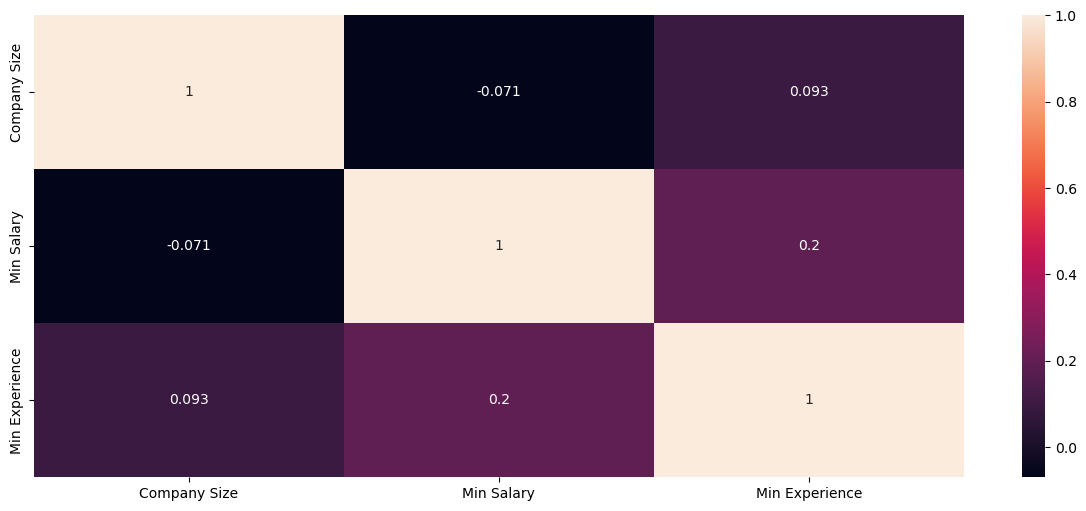

In [24]:
plt.figure(figsize=(15,6))
col=['Company Size','Min Salary','Min Experience']
sns.heatmap(df[col].corr(),annot=True)
plt.show()

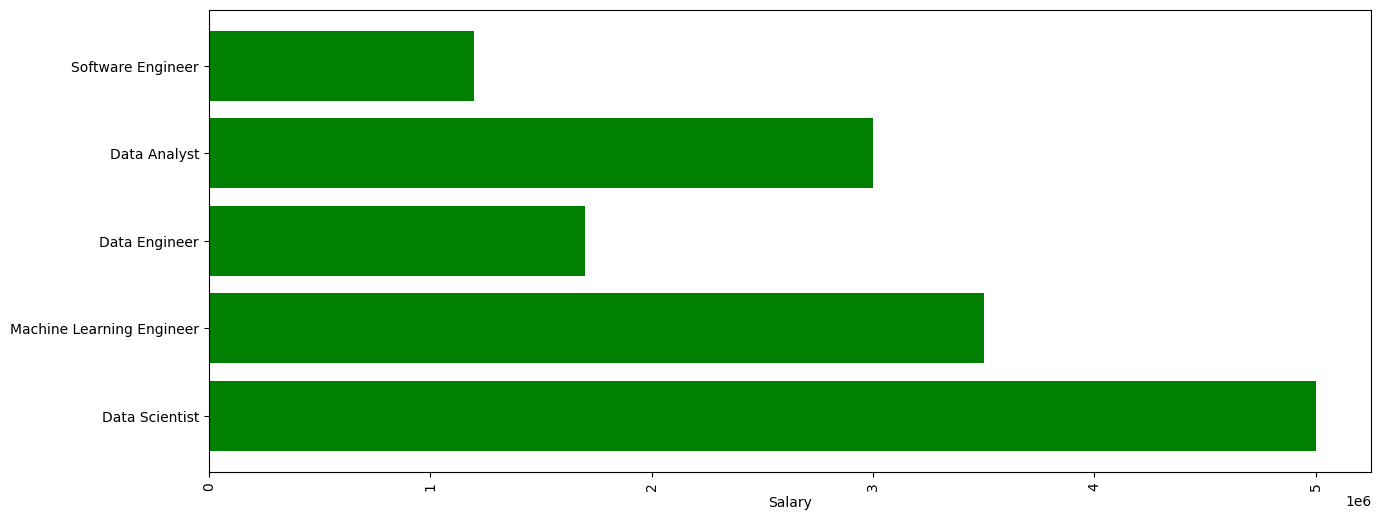

In [25]:
plt.figure(figsize=(15,6))
plt.barh(df['Role'],df['Min Salary'],color='green')
plt.xlabel('Salary')
plt.xticks(rotation=90)
plt.show()

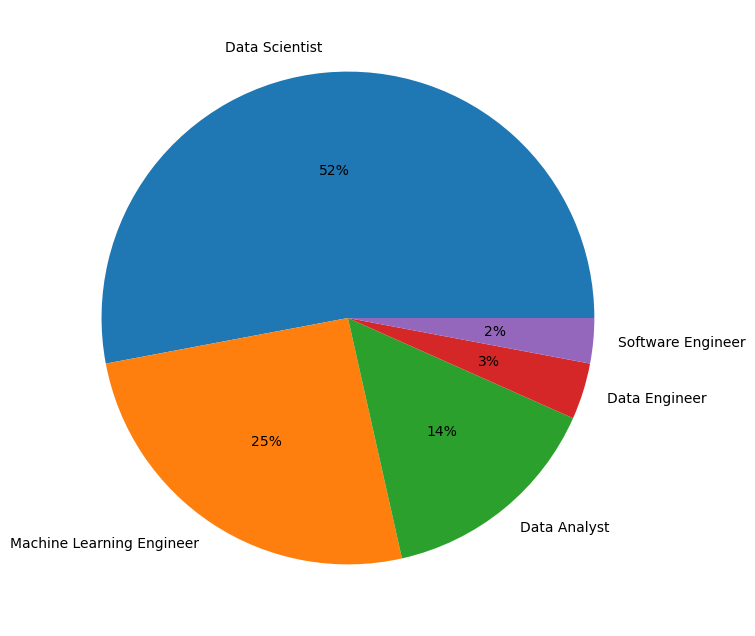

In [26]:
plt.figure(figsize=(12,8))
plt.pie(df['Role'].value_counts(),labels=df['Role'].value_counts().index,autopct='%d%%')
plt.show()

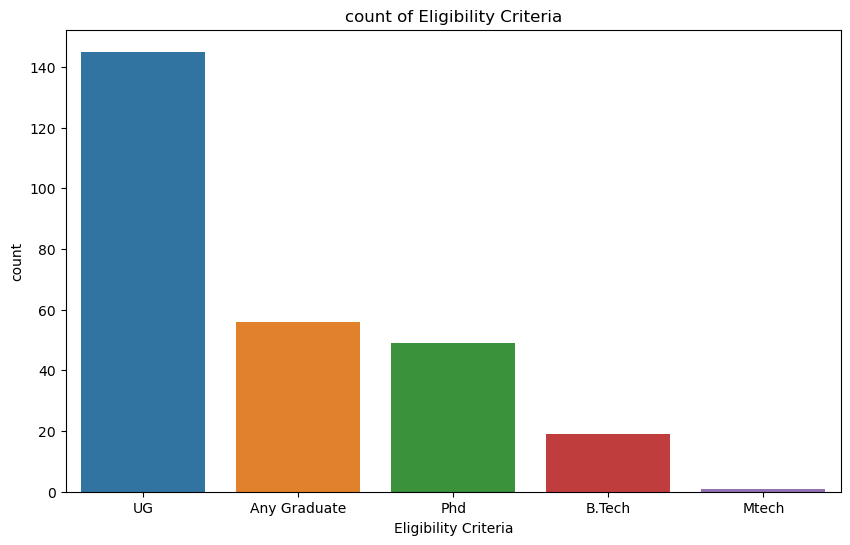

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x=df['Eligibility Criteria'],order=df['Eligibility Criteria'].value_counts().index)
plt.title("count of Eligibility Criteria")
plt.show()

In [28]:
df['Enrollment Type'].value_counts()

Full Time    211
Permanent     58
Freelance      1
Name: Enrollment Type, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
sc=StandardScaler()
oe=OrdinalEncoder()
# df.columns
df_scale=df.copy()

In [30]:
categ=['Role','Companies','Eligibility Criteria','Enrollment Type','Location']
df_scale[categ]=oe.fit_transform(df[categ])
df_scale

,Role,Companies,Location,Experience,Skills,Company Size,Eligibility Criteria,Enrollment Type,Salary,Min Salary,Max Salary,Min Experience
0,2.0,0.0,44.0,2 - 7 years,DataModeling\nEnterpriseApplications\nAnalytic...,838,1.0,0.0,1000000-2000000,1000000,2000000,2
1,3.0,0.0,35.0,0-5 Yrs,Python\nComputerVision\nMachineLearning\nR\nBu...,4000,4.0,1.0,1800000-3300000,1800000,3300000,0
2,2.0,1.0,6.0,6-11 Yrs,Machine Learning Code DataScience R Data Model...,10000,3.0,1.0,160000-185000,160000,185000,6
3,3.0,1.0,8.0,3-8 Yrs,DataScience\nR\nNLP\nAlgorithms\nArtificialInt...,10000,3.0,1.0,1200000-2100000,1200000,2100000,3
4,2.0,2.0,0.0,8-13 Yrs,Team Handling\nSegmentation\nOperations Resear...,200,3.0,1.0,5000000-1700000,5000000,1700000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
265,3.0,214.0,5.0,0-3 Yrs,MachineLearning\nC++\nDataStructures\nSoftware...,12000,4.0,1.0,850000-1300000,850000,1300000,0
266,2.0,159.0,53.0,0-4 Yrs,MachineLearning\nDeepLearning\nPython,200,0.0,1.0,500000-700000,500000,700000,0
267,0.0,141.0,0.0,0-5 Yrs,MachineLearning\nDataAnalytics\nOperations\nSQL,75400,4.0,1.0,400000-600000,400000,600000,0
268,2.0,182.0,53.0,1-3 Yrs,DataVisualization\nInformationTechnology\nAnal...,200,4.0,1.0,800000-1000000,800000,1000000,1


In [31]:
numer=['Company Size','Role','Location','Eligibility Criteria','Enrollment Type','Min Salary','Min Experience']
# df_scale=df.copy()
df_scale[numer]=sc.fit_transform(df_scale[numer])

In [32]:
df_scale.columns


Index(['Role', 'Companies', 'Location', 'Experience', 'Skills', 'Company Size',
       'Eligibility Criteria', 'Enrollment Type', 'Salary', 'Min Salary',
       'Max Salary', 'Min Experience'],
      dtype='object')

In [33]:
x=df_scale.drop(columns=['Skills','Min Salary','Experience','Salary','Companies','Min Salary','Max Salary'])
# x=df_scale.drop(columns=['Min Salary', 'Max Salary', 'Salary', 'Companies', 'Eligibility Criteria', 'Skills', 'Experience'])

y=df_scale['Min Salary']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [35]:
x_test

,Role,Location,Company Size,Eligibility Criteria,Enrollment Type,Min Experience
176,2.015135,-0.720983,-0.238781,0.757336,-0.506172,-1.042516
236,0.018487,-0.128476,-0.239232,-1.706287,1.891485,-0.646624
128,-1.978160,-0.720983,-0.239232,0.757336,-0.506172,0.145161
189,1.016811,-0.990304,-0.226601,0.757336,-0.506172,0.145161
196,0.018487,-0.290069,-0.217578,-1.090381,1.891485,0.145161
104,0.018487,-0.128476,-0.239232,0.757336,-0.506172,0.541053
42,0.018487,1.325858,-0.238556,0.757336,-0.506172,-0.646624
210,0.018487,2.133822,-0.217578,0.757336,-0.506172,-1.042516
144,1.016811,0.356302,-0.239232,-1.706287,1.891485,-0.250732
261,0.018487,0.140845,0.797476,0.757336,-0.506172,-0.250732


In [36]:
y_test.head()

176   -0.237368
236   -0.584925
128   -1.001992
189    0.979079
196    1.500414
Name: Min Salary, dtype: float64

# Importing models

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
models={
    'lr':LinearRegression(),
    "dtr":DecisionTreeRegressor(),
    'rf':RandomForestRegressor(n_estimators=39),
    'knn':KNeighborsRegressor(n_neighbors=5),
    'svr':SVR(kernel='rbf', C=1.0, epsilon=0.1),
    
}

In [39]:
for key,model in models.items():
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    mae=mean_absolute_error(y_test,pred)
    mse=mean_squared_error(y_test,pred)
    r2=r2_score(y_test,pred)
    print(f"Model: {key}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 35)

Model: lr
Mean Absolute Error (MAE): 0.68
Mean Squared Error (MSE): 0.65
R² Score: -0.11
-----------------------------------
Model: dtr
Mean Absolute Error (MAE): 0.89
Mean Squared Error (MSE): 1.29
R² Score: -1.23
-----------------------------------
Model: rf
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.55
R² Score: 0.04
-----------------------------------
Model: knn
Mean Absolute Error (MAE): 0.67
Mean Squared Error (MSE): 0.72
R² Score: -0.24
-----------------------------------
Model: svr
Mean Absolute Error (MAE): 0.65
Mean Squared Error (MSE): 0.66
R² Score: -0.13
-----------------------------------


In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(), x, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.2f}")

Cross-validated R²: -0.09


In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeRegressor(), x, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.2f}")

Cross-validated R²: -0.77


In [42]:
# random forest is performing well but need to be optimized.

# 

# 

# 

# 

# Unsupervised Learning

In [43]:
df_enc=df.copy()

In [44]:
df_enc.drop(columns=['Experience','Skills','Company Size','Salary','Max Salary'],inplace=True)

In [45]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [46]:
df_enc['Eligibility Criteria'].value_counts()

UG              145
Any Graduate     56
Phd              49
B.Tech           19
Mtech             1
Name: Eligibility Criteria, dtype: int64

In [47]:
df_enc.columns

Index(['Role', 'Companies', 'Location', 'Eligibility Criteria',
       'Enrollment Type', 'Min Salary', 'Min Experience'],
      dtype='object')

In [48]:
col=['Role', 'Companies', 'Location', 'Eligibility Criteria','Enrollment Type']
df_enc[col]=oe.fit_transform(df[col])
df_enc

,Role,Companies,Location,Eligibility Criteria,Enrollment Type,Min Salary,Min Experience
0,2.0,0.0,44.0,1.0,0.0,1000000,2
1,3.0,0.0,35.0,4.0,1.0,1800000,0
2,2.0,1.0,6.0,3.0,1.0,160000,6
3,3.0,1.0,8.0,3.0,1.0,1200000,3
4,2.0,2.0,0.0,3.0,1.0,5000000,8
...,...,...,...,...,...,...,...
265,3.0,214.0,5.0,4.0,1.0,850000,0
266,2.0,159.0,53.0,0.0,1.0,500000,0
267,0.0,141.0,0.0,4.0,1.0,400000,0
268,2.0,182.0,53.0,4.0,1.0,800000,1


In [49]:
col=['Min Salary', 'Min Experience']
df_enc[col]=sc.fit_transform(df[col])
df_enc

,Role,Companies,Location,Eligibility Criteria,Enrollment Type,Min Salary,Min Experience
0,2.0,0.0,44.0,1.0,0.0,0.110188,-0.646624
1,3.0,0.0,35.0,4.0,1.0,1.500414,-1.438409
2,2.0,1.0,6.0,3.0,1.0,-1.349549,0.936945
3,3.0,1.0,8.0,3.0,1.0,0.457745,-0.250732
4,2.0,2.0,0.0,3.0,1.0,7.061317,1.728730
...,...,...,...,...,...,...,...
265,3.0,214.0,5.0,4.0,1.0,-0.150479,-1.438409
266,2.0,159.0,53.0,0.0,1.0,-0.758703,-1.438409
267,0.0,141.0,0.0,4.0,1.0,-0.932481,-1.438409
268,2.0,182.0,53.0,4.0,1.0,-0.237368,-1.042516


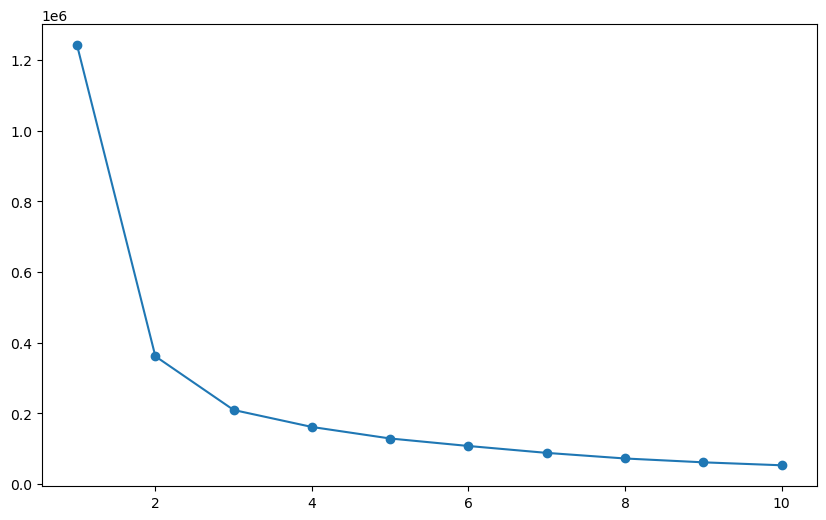

In [50]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++')
    km.fit_predict(df_enc)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker="o")
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

models = {
    "KMeans": KMeans(n_clusters=3, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=3),
    "DBSCAN": DBSCAN()
}

silhouette_scores = {}
cluster_labels = {}
for key, model in models.items():
    # df_enc['labels'] = model.fit_predict(df_enc)
    labels= model.fit_predict(df_enc)
    cluster_labels[key] = labels
    if len(set(labels)) > 1:  # Ensure more than one cluster exists
        score = silhouette_score(df_enc, labels)
        silhouette_scores[key] = score


In [52]:
# best_model = max(silhouette_scores, key=silhouette_scores.get)
# print("Best Model based on Silhouette Score:", best_model)
print("Silhouette Scores:", silhouette_scores)

Silhouette Scores: {'KMeans': 0.4859540873625931, 'Agglomerative': 0.4602938072295912}


<Figure size 1000x600 with 0 Axes>

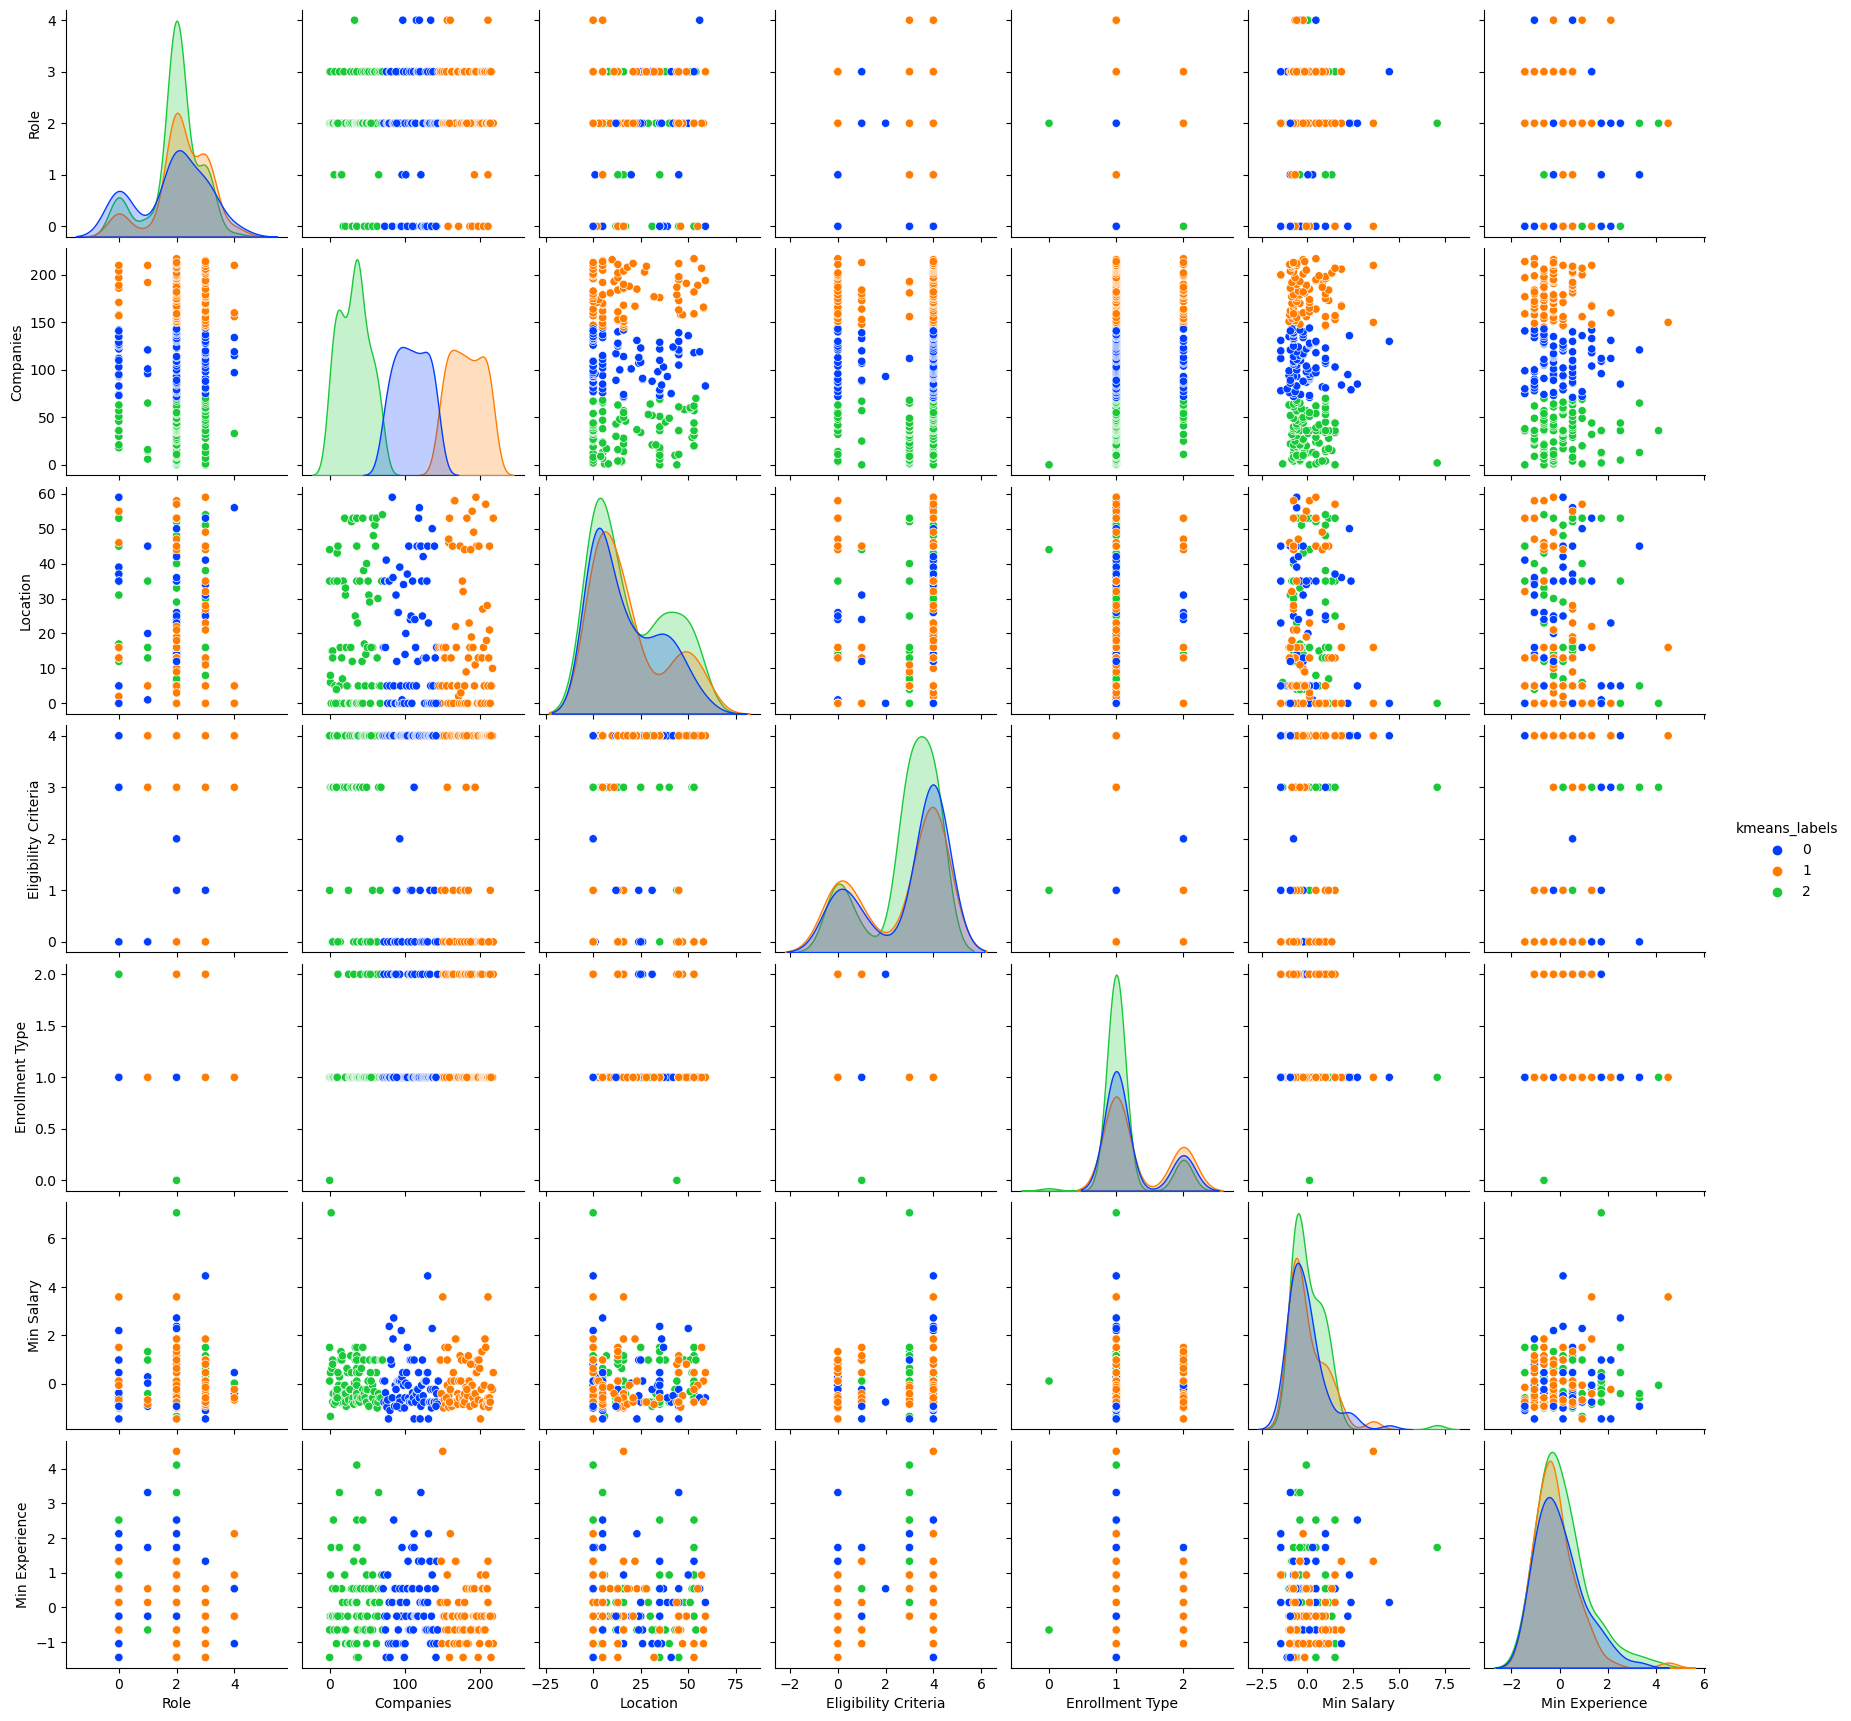

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_enc)
df_enc['kmeans_labels'] = kmeans_labels
plt.figure(figsize=(10,6))
sns.pairplot(df_enc,hue='kmeans_labels',palette='bright')

In [55]:
from sklearn.metrics import silhouette_score
silhouette_score(df_enc,df_enc['kmeans_labels'])

0.4861426244273951

# PCA

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(df_enc)
x_pca = pca.transform(df_enc)

# Create the dataframe
df_pca = pd.DataFrame(x_pca,columns=['PC{}'.format(i+1) for i in range(5)])
print(df_pca)


            PC1        PC2       PC3       PC4       PC5
0   -100.972359  25.489229  1.604257 -0.530059  0.213489
1   -100.960377  16.488397 -1.163278 -0.766215  1.821392
2    -99.925691 -12.515569 -0.118129 -0.379064 -0.691691
3    -99.926257 -10.513871 -0.154704 -0.552065  1.168945
4    -98.925940 -18.516338 -0.325638  5.102056  4.071909
..          ...        ...       ...       ...       ...
265  113.080247 -13.235762 -1.356208 -1.301969  0.775231
266   58.022651  34.694698  2.627685 -1.232084 -0.338250
267   40.092380 -18.326190 -1.322078 -0.728984 -2.275511
268   81.017616  34.723038 -1.325369 -0.680344 -0.034165
269  -11.918735  -6.402216  1.718517 -0.712562 -0.682253

[270 rows x 5 columns]


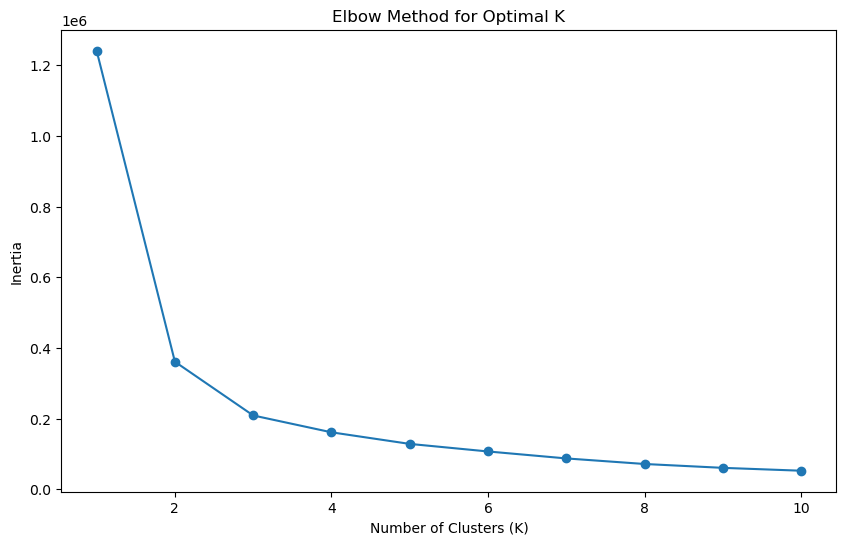

In [60]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Visualization: Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [75]:
models = {
    "KMeans": KMeans(n_clusters=2,init='k-means++', random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=2),
    "DBSCAN": DBSCAN()
}

silhouette_scores = {}
cluster_labels = {}
for name, model in models.items():
    labels = model.fit_predict(df_pca)
    cluster_labels[name] = labels
    if len(set(labels)) > 1: 
        score = silhouette_score(df_pca, labels)
        silhouette_scores[name] = score

In [76]:
print("Silhouette Scores:", silhouette_scores)

Silhouette Scores: {'KMeans': 0.5721364876800961, 'Agglomerative': 0.5071807421622311}


<Figure size 1000x600 with 0 Axes>

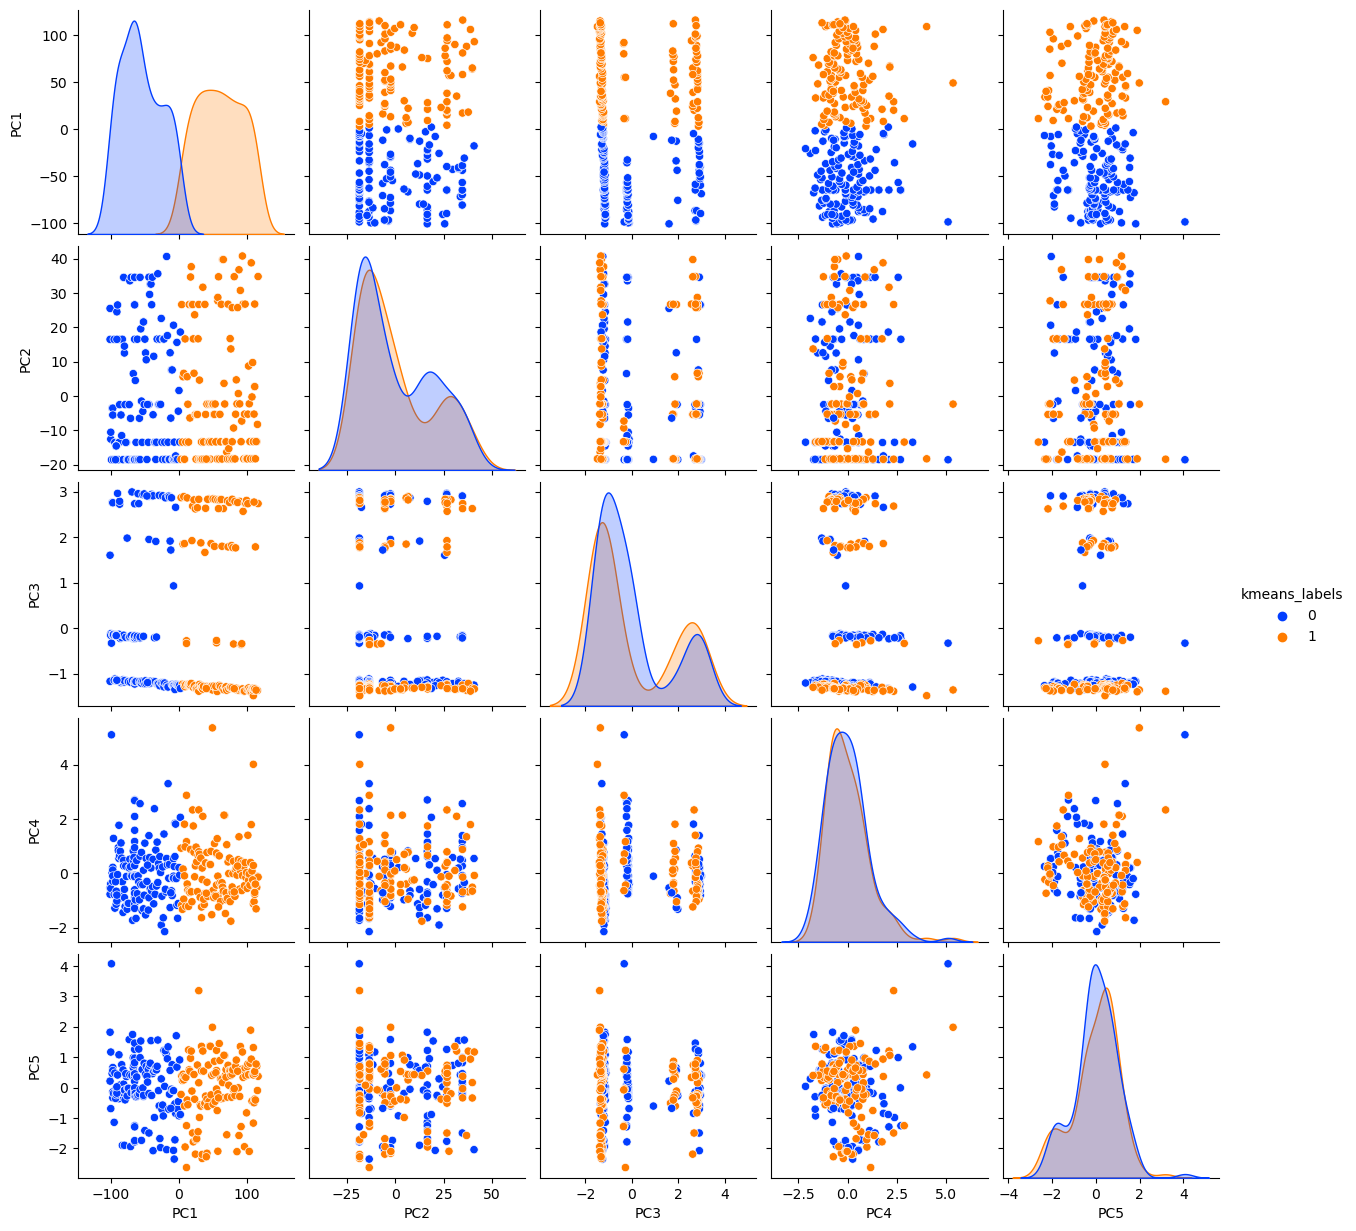

In [78]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)

df_pca['kmeans_labels'] = kmeans_labels
plt.figure(figsize=(10,6))
sns.pairplot(df_pca,hue='kmeans_labels',palette='bright')